In this project, we will use stacks to implement an algorithm that can evaluate numerical expressions.

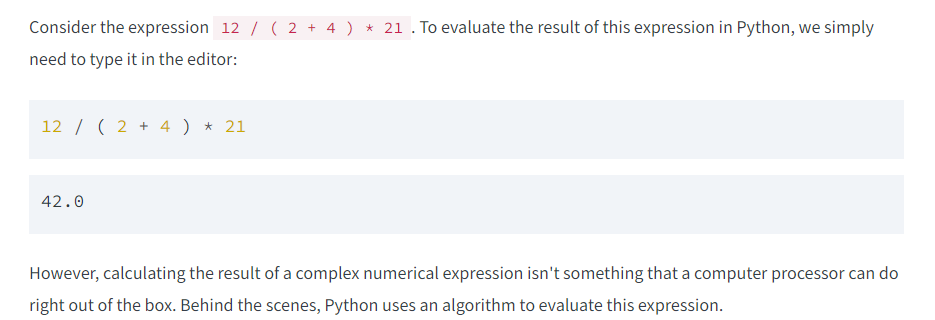

The goal of this project is to use the stack data structure that we've worked with to implement an algorithm that can evaluate complex numerical expressions.

By the end of this project, We'll know how to implement a function named `evaluate()` that can evaluate expressions stored in string, like so:

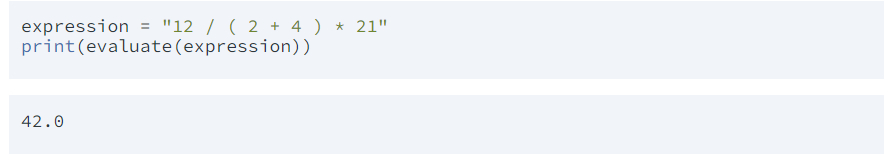

We'll start describing and implementing the algorithm. Before we do, let's bring in the stack implementation because the algorithm will use a stack.

**Task**

The file `linked_list.py` contains has the `LinkedList` implementation.

1. Import the `LinkedList` from `linked_list`.

2. Bring in the `Stack` implementation (copy pasting from previous file).

**Answer**

### Importing the LinkedList and Stack

In [1]:
from linked_list import LinkedList

class Stack(LinkedList):
    
    def push(self, data):
        self.append(data)

    def peek(self):
        return self.tail.data

    def pop(self):
        ret = self.tail.data
        if self.length == 1:
            self.tail = self.head = None
        else:
            self.tail = self.tail.prev
            self.tail.next = None
        self.length -= 1
        return ret

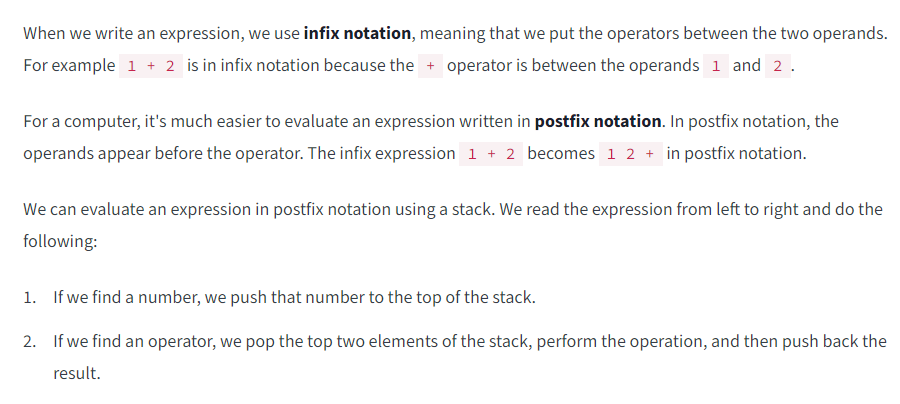

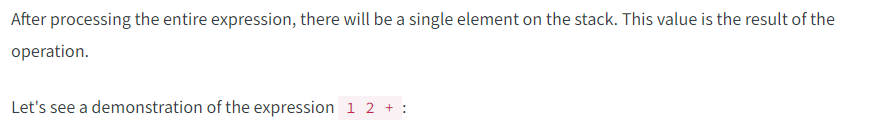

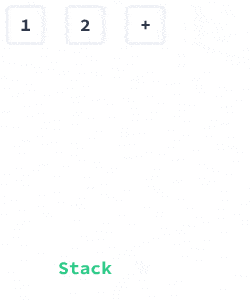

In [2]:
from IPython.display import Image

Image("2.1-m564.gif")

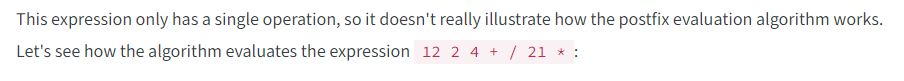

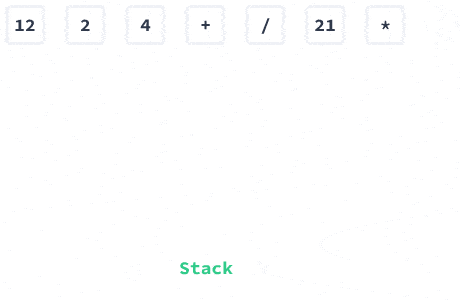

In [3]:
Image("2.2-m564.gif")

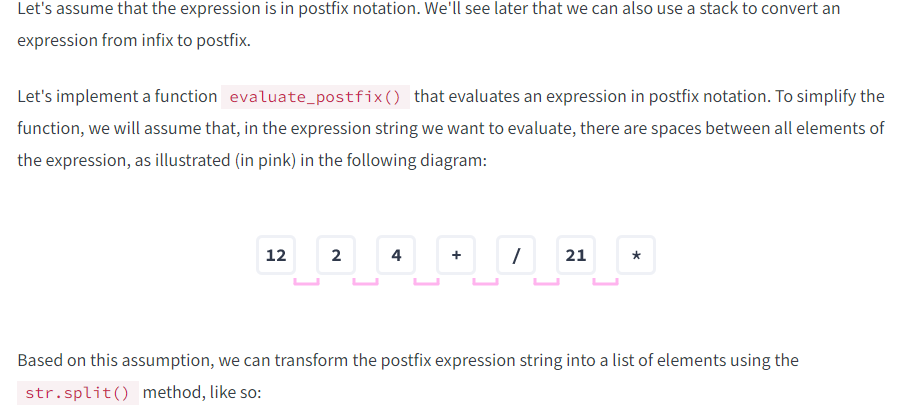

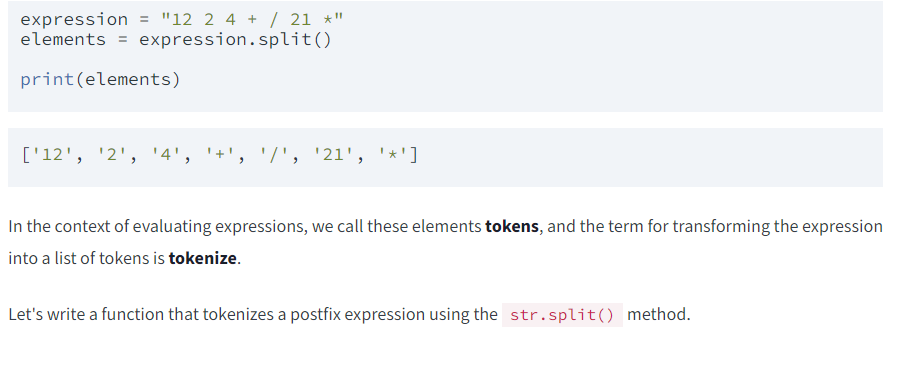

**Task**

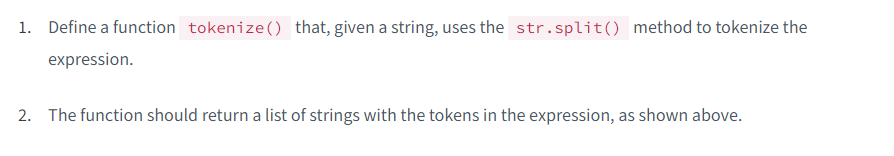

**Answer**

In [4]:
# Implementing the tokenize function

def tokenize(expression):
    return expression.split()

print(tokenize("12 2 4 + / 21 *"))

['12', '2', '4', '+', '/', '21', '*']


Above we learned that we can evaluate an expression in postfix notation using a stack. The idea is that we read the expression from left to right and do the following:

1. If we find a number, then we push that number to the top of the stack.
2. If we find an operator, we pop the top two elements of the stack, perform the operation, and then push back the result.

There is one important detail we need to consider in the second step. When we find an operator, we pop the top two values on the top of the stack. When we apply the operator to those two elements, we need to make sure we operate those two numbers in the correct order.

Consider the expression `1 - 2`. We need to subtract `2` from `1` and not the other way around. The element at the top of the stack is actually the second operand in the expression, while the element that is second to top is the first operand:

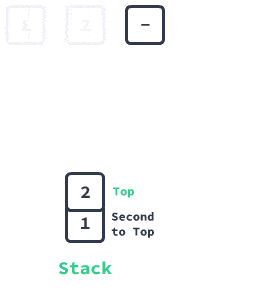

In [5]:
Image("3.1-m564.gif")

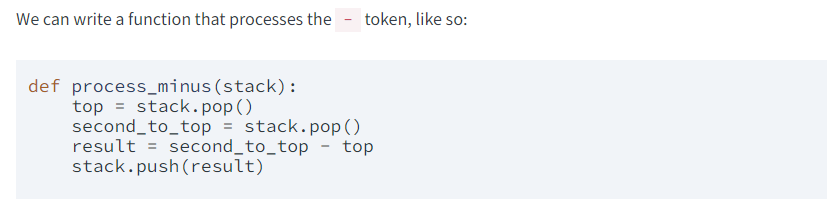

This function will be called when we find the `-` token. Let's write similar functions for the `+`, `*`, `/`, and `**` operators.

**Task**

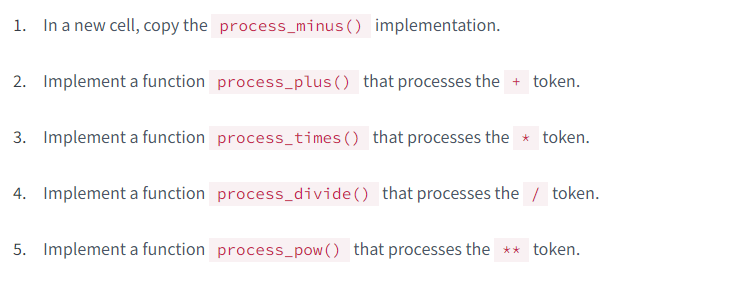

**Answer**

In [6]:
def process_minus(stack):
    top = stack.pop()
    second_to_top = stack.pop()
    result = second_to_top - top
    stack.push(result)
    
def process_plus(stack):
    top = stack.pop()
    second_to_top = stack.pop()
    # Same as process_minus but with + instead of -
    result = second_to_top + top
    stack.push(result)
    
def process_times(stack):
    top = stack.pop()
    second_to_top = stack.pop()
    # Same as process_minus but with * instead of -
    result = second_to_top * top
    stack.push(result)

def process_divide(stack):
    top = stack.pop()
    second_to_top = stack.pop()
    # Same as process_minus but with / instead of -
    result = second_to_top / top
    stack.push(result)
    
def process_pow(stack):
    top = stack.pop()
    second_to_top = stack.pop()
    # Same as process_minus but with ** instead of -
    result = second_to_top ** top
    stack.push(result)

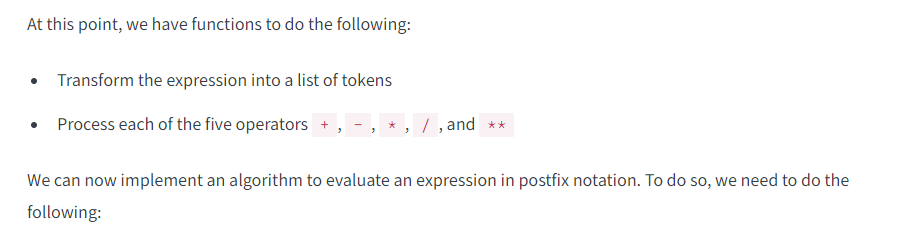

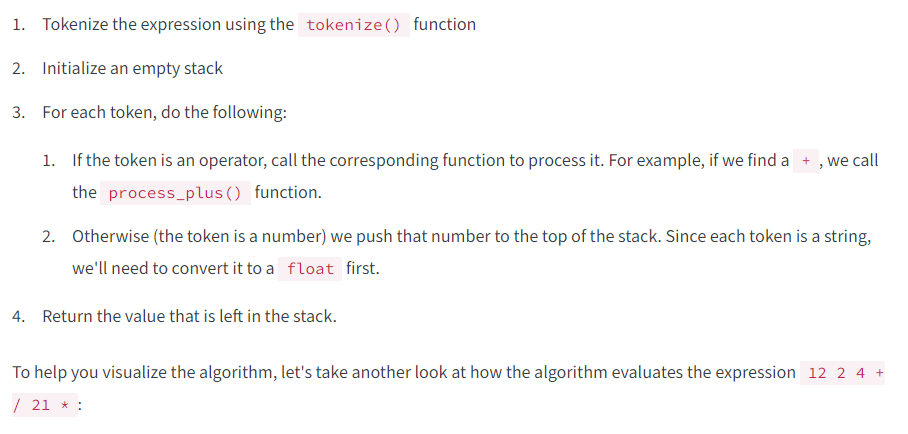

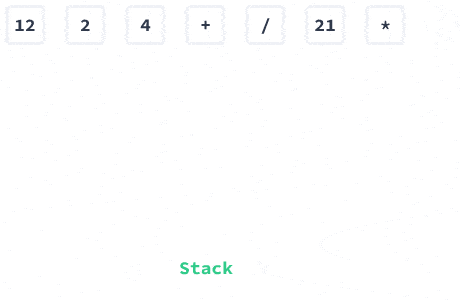

In [7]:
Image("4.1-m564.gif")

**Task**

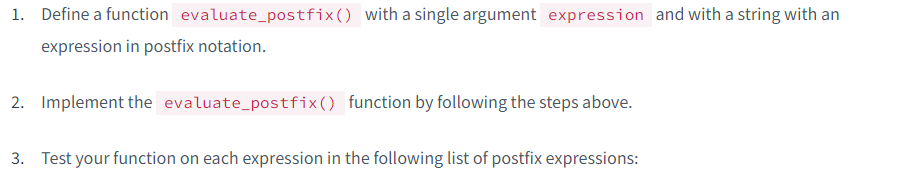

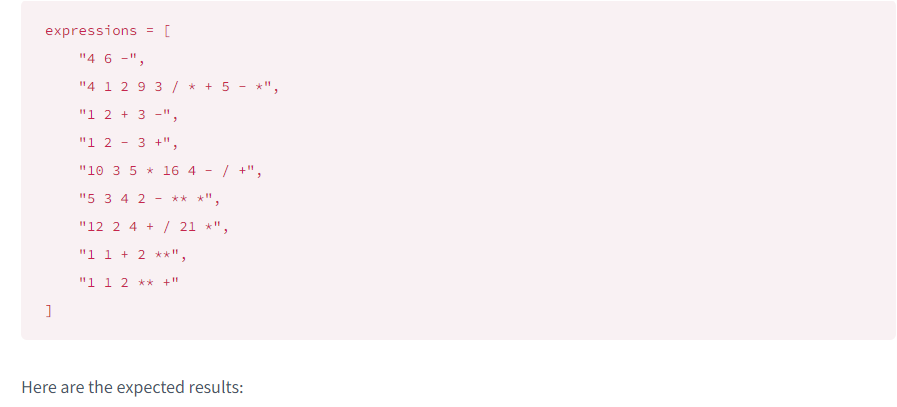

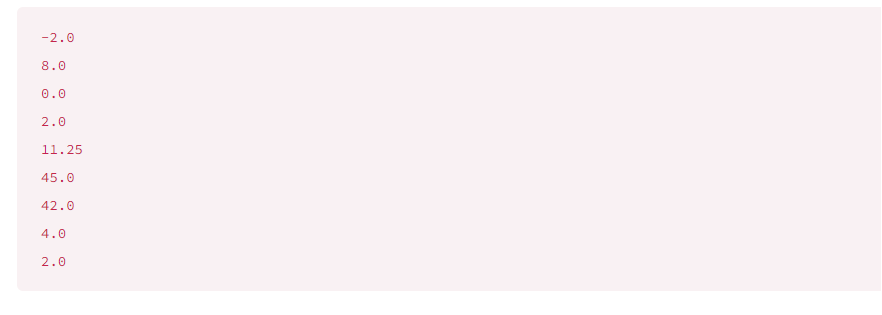

**Answer**

In [8]:
def evaluate_postfix(expression):
    tokens = tokenize(expression)
    stack = Stack()
    for token in tokens:
        if token == "+":
            process_plus(stack)
        elif token == "-":
            process_minus(stack)
        elif token == "*":
            process_times(stack)
        elif token == "/":
            process_divide(stack)
        elif token == "**":
            process_pow(stack)
        else:
            # The token is not an operator so it must be a number
            stack.push(float(token))
    return stack.pop()

In [9]:
# Testing the implementation
# When testing with other expressions we need to add spaces between at two tokens.
# For example 1 + 3 will work but 1+3 won't.

expressions = [
    "4 6 -",
    "4 1 2 9 3 / * + 5 - *",
    "1 2 + 3 -",
    "1 2 - 3 +",
    "10 3 5 * 16 4 - / +",
    "5 3 4 2 - ** *",
    "12 2 4 + / 21 *",
    "1 1 + 2 **",
    "1 1 2 ** +"
]

for expression in expressions:
    print(evaluate_postfix(expression))

-2.0
8.0
0.0
2.0
11.25
45.0
42.0
4.0
2.0


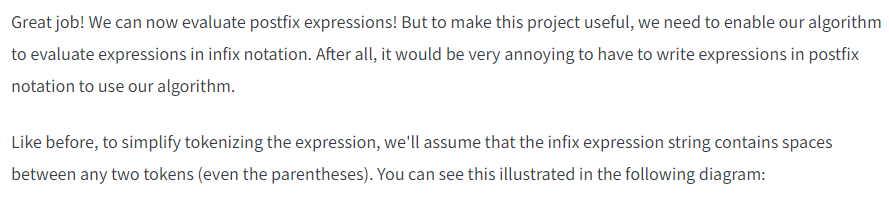

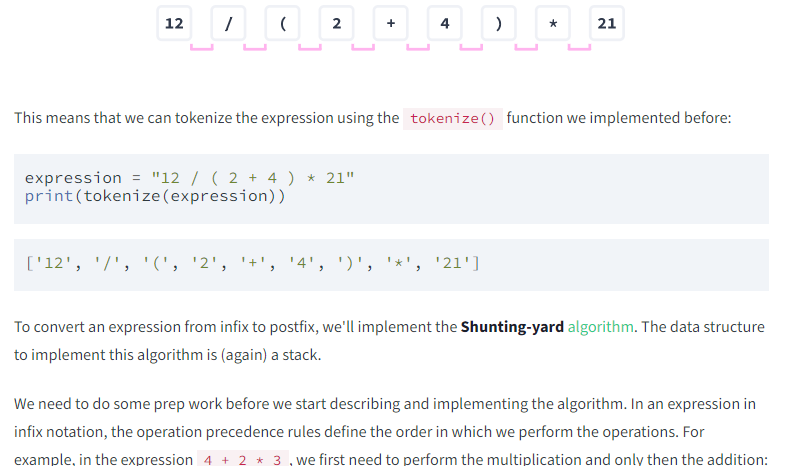

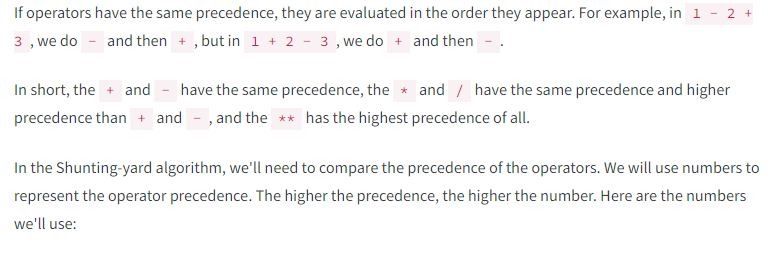

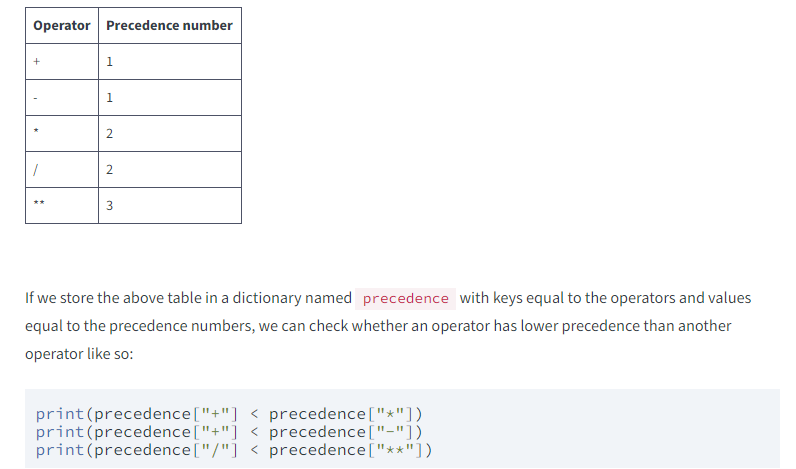

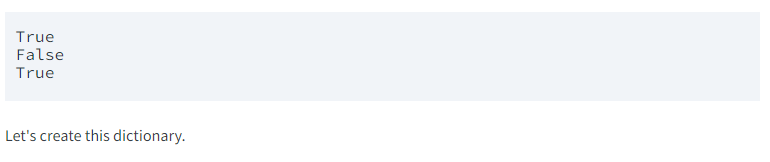

**Task**

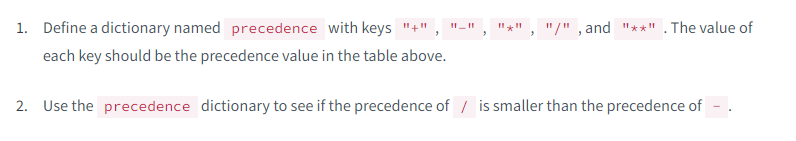

**Answer**

In [10]:
# Precedence dictionary
# The precedence dictionary is used to compare the precedence of two operators.

precedence = {
    "+": 1,
    "-": 1,
    "*": 2,
    "/": 2,
    "**": 3
}

print(precedence["/"] < precedence["-"])
print(precedence["+"] < precedence["*"])
print(precedence["+"] < precedence["-"])
print(precedence["/"] < precedence["**"])

False
True
False
True


Now, we'll implement a function `infix_to_postfix()` that, given a string with an expression in infix notation, outputs a string with that expression written in postfix notation.

Here's an example of usage:

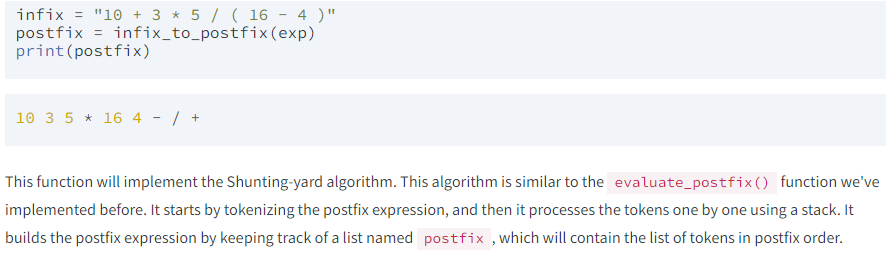

Here's how processing should go for each token:

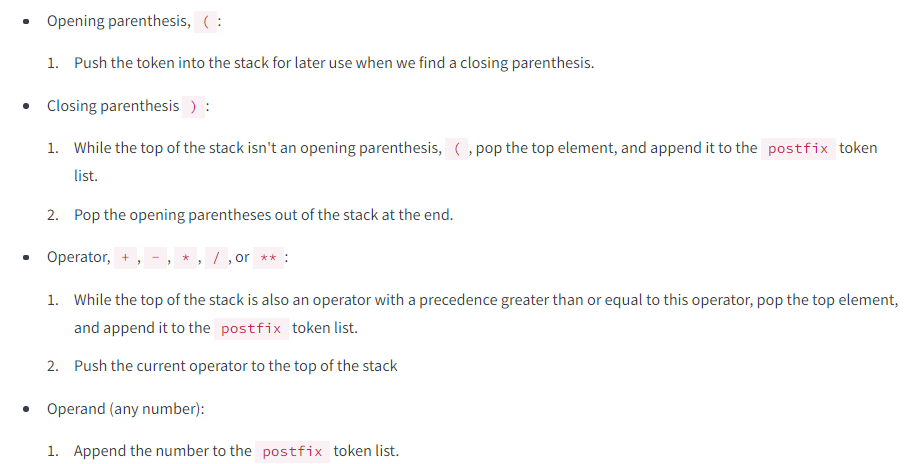

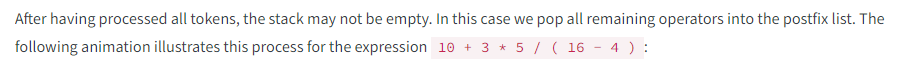

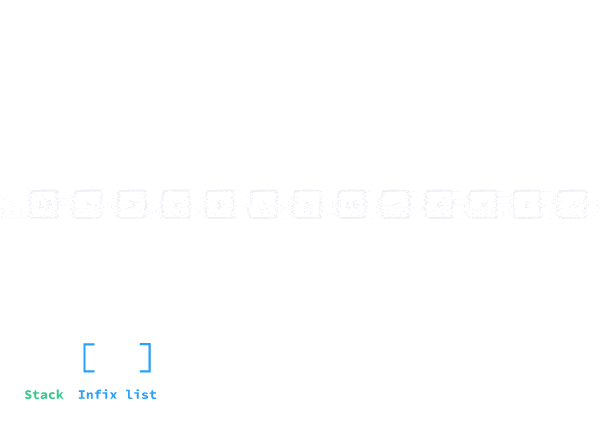

In [11]:
Image("6.1-m564.gif")

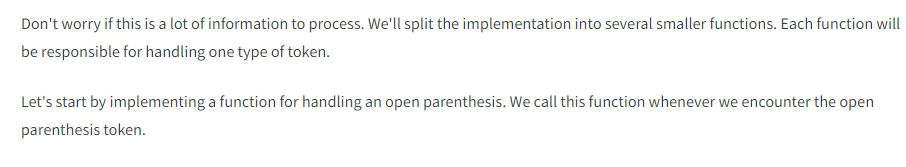

**Task**

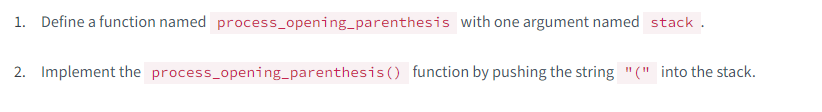

**Answer**

### Processing tokens in infix to postfix conversions

#### Opening parenthesis

* Opening parentheses, `(`:
     1. Push the token into the stack. It will be used later when we find a closing parenthesis.

In [12]:
def process_opening_parenthesis(stack):
    stack.push("(")

Now we'll write a function for handling a closing parenthesis. Here's how the algorithm specification said we should handle this case:

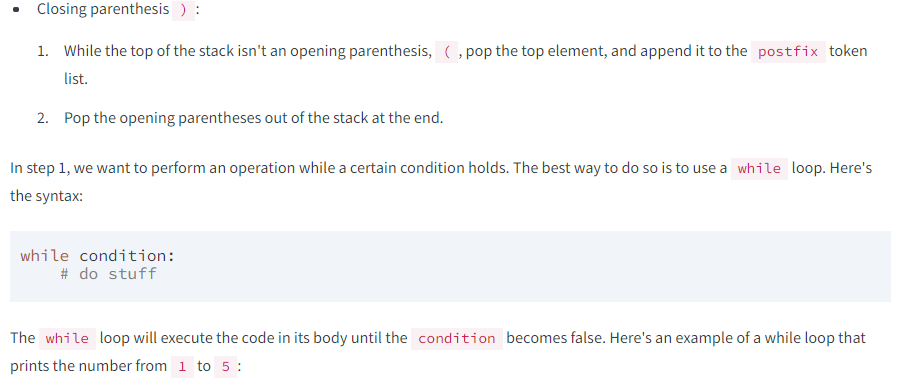

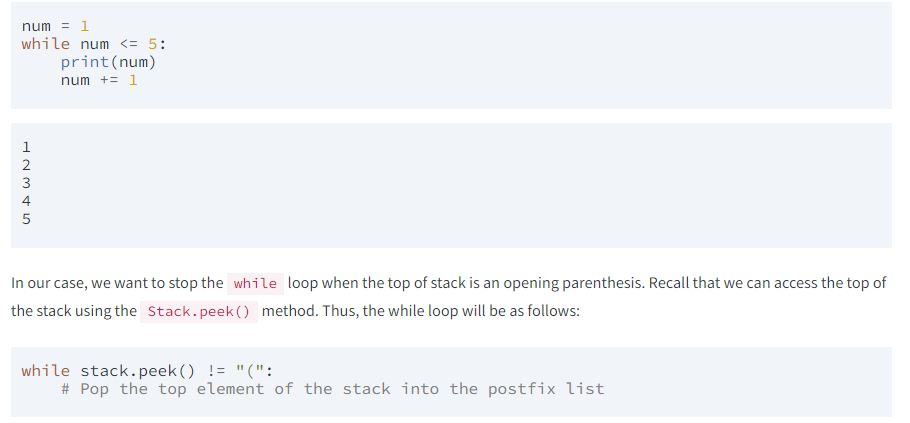

**Task**

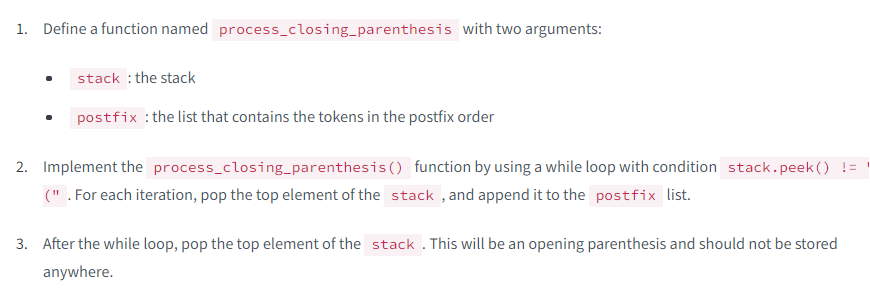

**Answer**

### Closing parenthesis

* Closing parentheses `)`:

    1. While the top of the stack is not an opening parenthesis, `(`, pop the top element and append it to the postfix token list.
    2. Pop the opening parentheses out of the stack at the end.

In [13]:
def process_closing_parenthesis(stack, postfix):
    # Add tokens until we find the open bracket
    while stack.peek() != "(":
        postfix.append(stack.pop())
    # Remove the opening bracket
    stack.pop()

Now, we'll write a function for handling operators. Here's how the algorithm specification said we should handle this case:

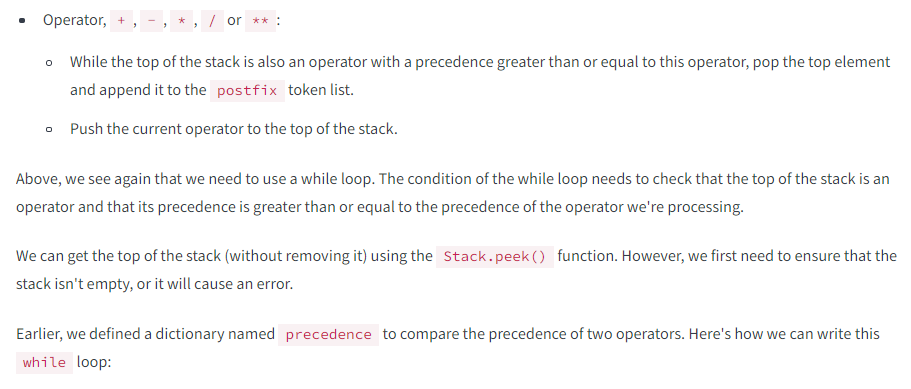

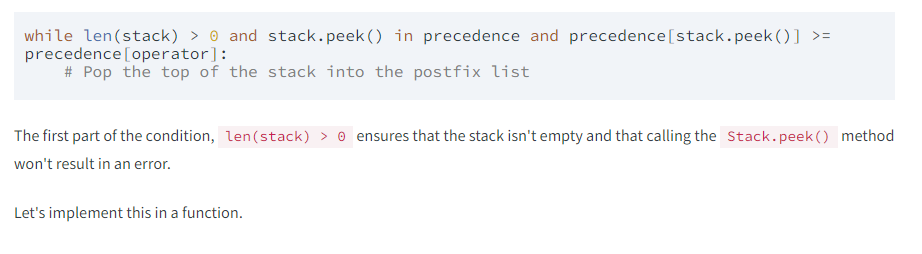

**Task**

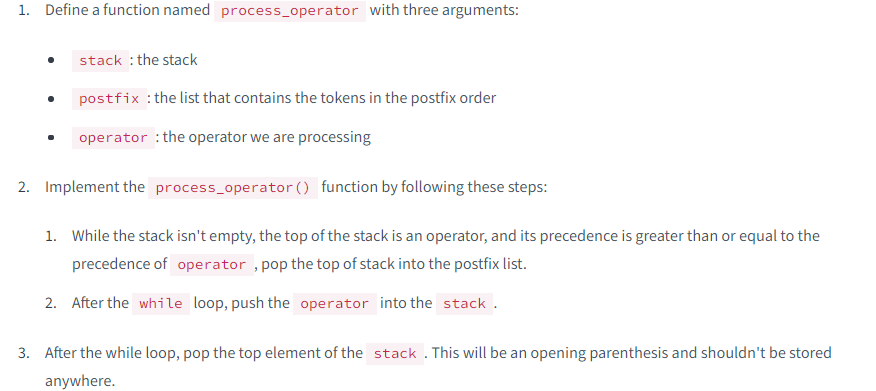

**Answer**

### Operators

Operator, `+`, `-`, `*`, `/` or `**`:

1. While the top of the stack is also an operator whose precedence is greater than or equal to this operator, pop the top element and append it to the postfix token list.
2. Push the current operator to the top of the stack.

The `Stack.peek()` method will cause an error if the stack is empty. Thus, in the while loop we also need to check that the stack is not empty.

In [14]:
def process_operator(stack, postfix, operator):
    while len(stack) > 0 and stack.peek() in precedence and precedence[stack.peek()] >= precedence[operator]:
        postfix.append(stack.pop())
    stack.push(operator)

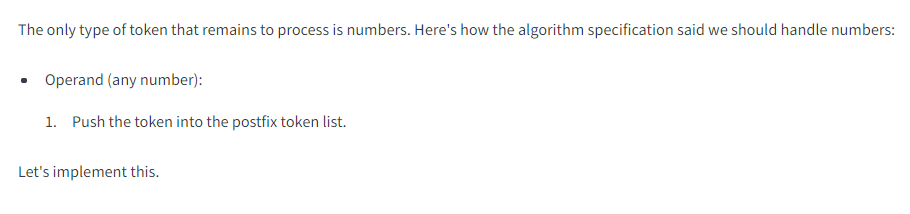

**Task**

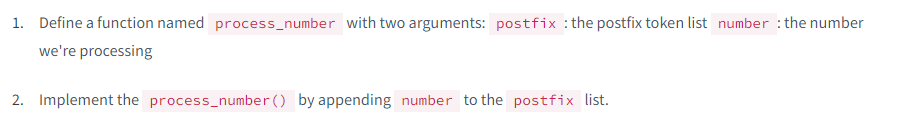

**Answer**

### Numbers

* Operand (any number):
    1. Push the token into the the postfix token list.

In [15]:
def process_number(postfix, number):
    postfix.append(number)

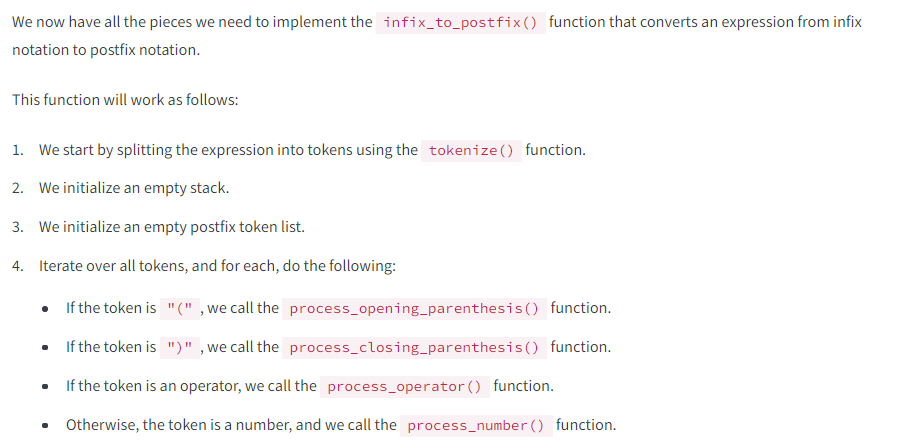

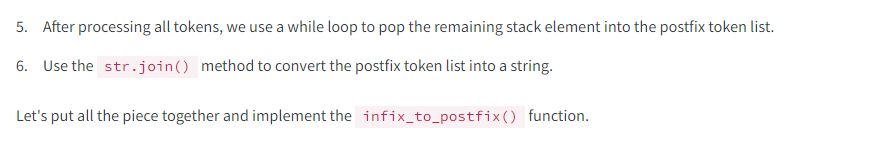

**Task**

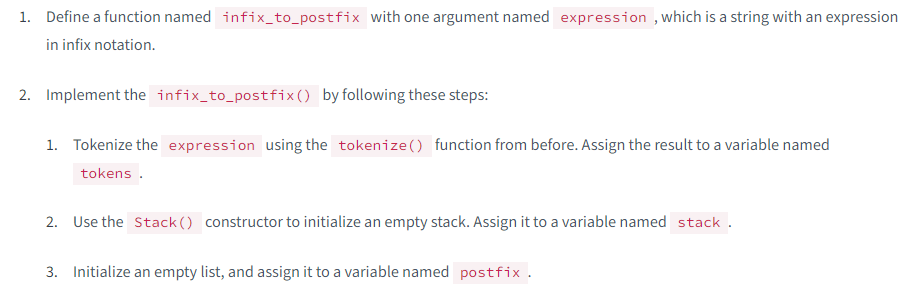

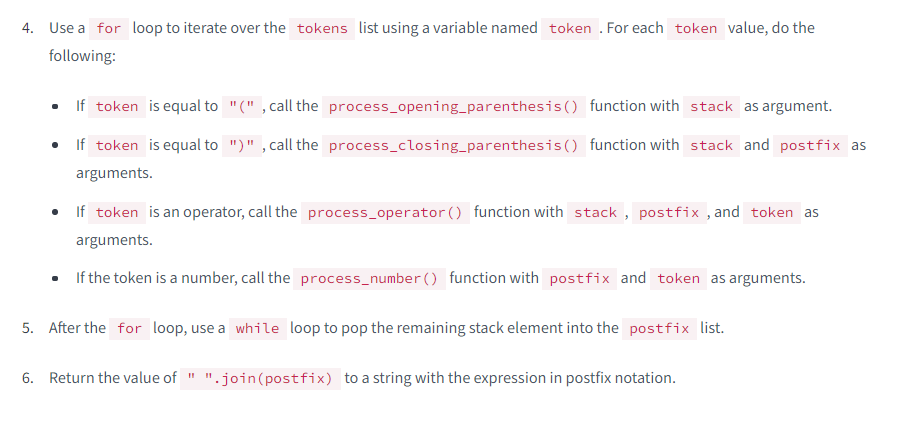

**Answer**

### The Shunting-yard Algorithm

* We start by splitting the expression into tokens using the `tokenize()` function.
* We initialize an empty stack.
* We initialize and empty postfix token list.
* Iterate over all tokens and for each of them:
    * If the token is `"("` we call the `process_opening_parenthesis()` function.
    * If the token is `")"` we call the `process_closing_parenthesis()` function.
    * If the token is an operator we call the `process_operator()` function.
    * Otherwise, the token is a number and we call the `process_number()` function.
* After processing all tokens, we use a `while` loop to pop the remaining stack element into the postfix token list.
* Use the `str.join()` method to convert the postfix token list into a string.

In [16]:
def infix_to_postfix(expression):
    tokens = tokenize(expression)
    stack = Stack()
    postfix = []
    for token in tokens:
        if token == "(":
            process_opening_parenthesis(stack)
        elif token == ")":
            process_closing_parenthesis(stack, postfix)
        elif token in precedence:
            process_operator(stack, postfix, token)
        else:
            process_number(postfix, token)
    while len(stack) > 0:
        postfix.append(stack.pop())
    return " ".join(postfix)

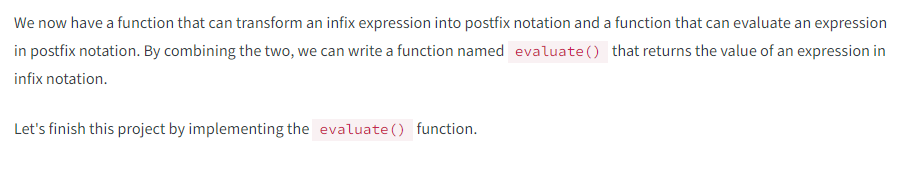

**Task**

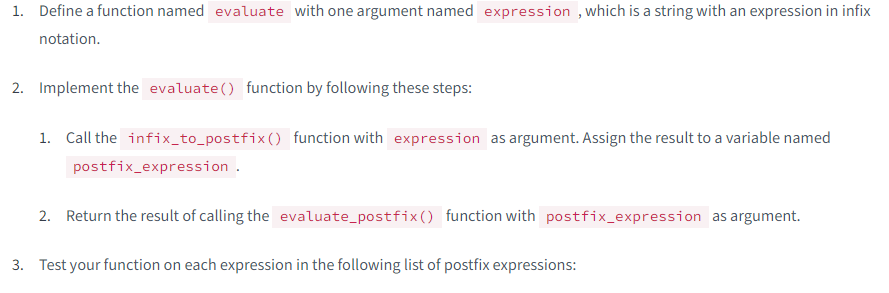

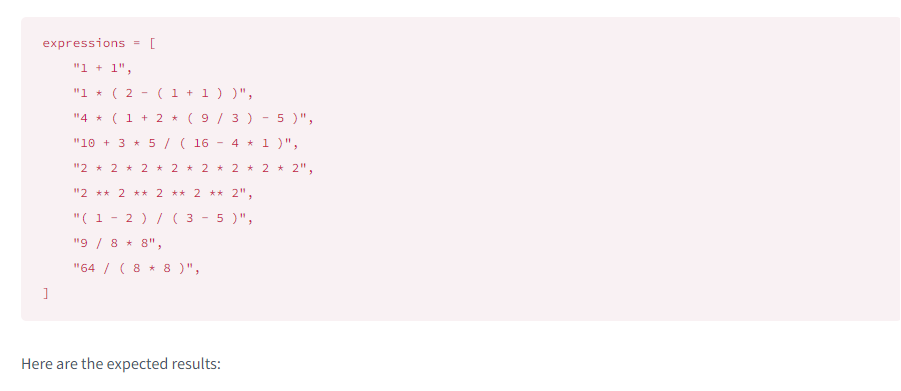

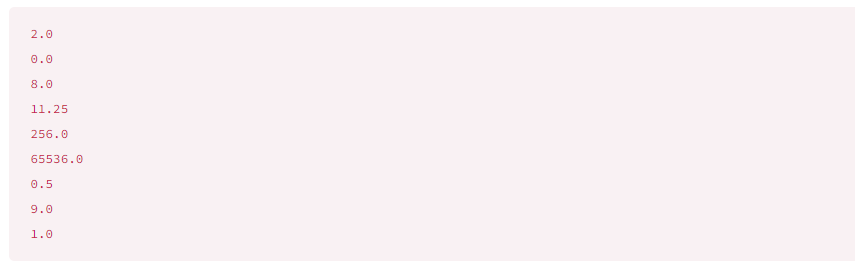

**Answer**

In [17]:
# Evaluating Infix Expressions

def evaluate(expression):
    postfix_expression = infix_to_postfix(expression)
    return evaluate_postfix(postfix_expression)

In [18]:
expressions = [
    "1 + 1",
    "1 * ( 2 - ( 1 + 1 ) )",
    "4 * ( 1 + 2 * ( 9 / 3 ) - 5 )",
    "10 + 3 * 5 / ( 16 - 4 * 1 )",
    "2 * 2 * 2 * 2 * 2 * 2 * 2 * 2",
    "2 ** 2 ** 2 ** 2 ** 2",
    "( 1 - 2 ) / ( 3 - 5 )",
    "9 / 8 * 8",
    "64 / ( 8 * 8 )",
]

for expression in expressions:
    print(evaluate(expression))

2.0
0.0
8.0
11.25
256.0
65536.0
0.5
9.0
1.0


Congratulations! we've implemented an algorithm that can evaluate expressions stored in strings! This is quite a feat, as this algorithm is far from straightforward.

Hopefully this project helped us see that stacks have many applications and that they can solve complex problems.

One of the limitations of our implementation is that it requires spaces to separate every part of the expression. For example, we can evaluate the expression `2 * ( 5 - 3 )`, but we can't evaluate `2 * (5 - 3) or 2*(5 - 3)`. If we're interested in expanding this, we could think about improving the `tokenize()` method to make it more robust.

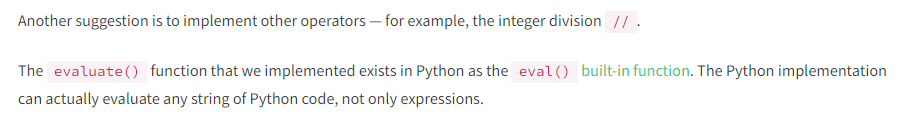